In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
def distance(X, Y):
    return np.linalg.norm(np.subtract(X,Y))

In [4]:
class Particle:
    """Creates an instance of a particle, which can be time evolved
    Parameters
    ----------
    attr : pointer to a Particle
    pos : nd-array
        initial position of mass. default np.array([0,0])
    """
    def __init__(self, pos):
        """Internal method. Initializes the Particle to a certain position.
        Parameters
        ----------
        pos : starting position of the particle
        """
        self.pos = pos
        self.history = []
        self.attr = None
        
    def attractor(self, attr):
        """External method. Sets the attractor.
        Parameters
        ----------
        attr : the particle that self should chase
        """
        self.attr = attr
        
    def dim(self, num):
        """External method. returns the history vector along a dimension.
        Parameters
        ----------
        num : the dimension (e.g. the x dimesion is given by num = 0)
        """
        return [v[num] for v in self.history]
    
    def step(self, dt):
        change = np.subtract(self.attr.pos, self.pos)
        change = change / np.linalg.norm(change)
        self.pos = np.add(self.pos,  change * dt)
        self.history.append(self.pos)
        
def run(Particles,dt, converge): # dt, epsilon = 0.01, time = 0):
    """Simulates the attraction modeel for (time / dt) time steps.
        One of time/epsilon must be specified
        
        Parameters
        ----------
        Paticles : a list of  Particles
        dt : size of time step
        epsilon : radius of convergence
        """
    sum_dist = 0
    while (not converge(Particles, dt * 10)):
        for particle in Particles:
            particle.step(dt)

In [9]:
# methods of Convergence. 
# sum of pairwise distance
# radius of convergence
# 

def epsilon_ball(Dots, epsilon):
    """ Tries to determine if all Dots are within
    some epsilon ball. """
    avg = np.mean([dot.pos for dot in Dots])
    for dot in Dots:
        if (distance(dot.pos, avg) >= epsilon):
            return False
    return True
    

def pairwise_distance(Dots, epsilon):
    sum = 0
    for p1 in Dots:
        for p2 in Dots:
            if (p1 != p2):
                sum += distance(p1.pos, p2.pos)
    return sum < epsilon

In [25]:
C1 = Particle([0.25])
B1 = Particle([0])
A1 = Particle([0.9])
D1 = Particle([1])
E1 = Particle([0.2])

A1.attractor(B1);
B1.attractor(C1);
C1.attractor(D1);
D1.attractor(A1);
E1.attractor(A1);

run([A1,B1,C1,D1, E1], 0.01, pairwise_distance)

<function matplotlib.pyplot.show(*args, **kw)>

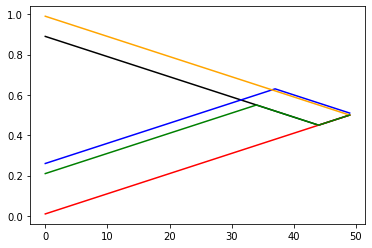

In [26]:
plt.plot(A1.dim(0), color='black')
plt.plot(B1.dim(0), color='red')
plt.plot(C1.dim(0), color='blue')
plt.plot(D1.dim(0), color='orange')
plt.plot(E1.dim(0), color='green')
plt.show

In [7]:
C = Particle([1,1])
B = Particle([0.5,1])
A = Particle([1,0])
D = Particle([0,0])
A.attractor(B);
B.attractor(C);
C.attractor(D);
D.attractor(A);

In [77]:
run([A,B,C,D], 0.01, pairwise_distance)

<function matplotlib.pyplot.show(*args, **kw)>

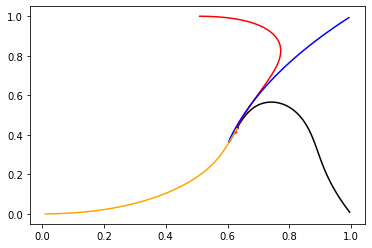

In [78]:
plt.plot(A.dim(0), A.dim(1), color='black')
plt.plot(B.dim(0), B.dim(1), color='red')
plt.plot(C.dim(0), C.dim(1), color='blue')
plt.plot(D.dim(0), D.dim(1), color='orange')
plt.show

In [79]:
X1 = Particle([1,1,1])
X2 = Particle([0,0,0])
X3 = Particle([0,1,1])
X4 = Particle([1,0,0])
X1.attractor(X2);
X2.attractor(X3);
X3.attractor(X4);
X4.attractor(X1);
run([X1, X2, X3, X4], 0.001, pairwise_distance)

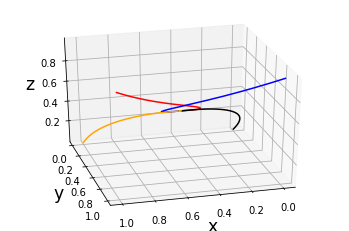

In [80]:
# Now we make a 3-d plot

#  Make your 3-d trajectory plot here
fig = plt.figure() 
ax = plt.gca(projection='3d')

# Access the particle positions here
for p in [[X1, 'red'], [X2, 'black'], [X3, 'blue'], [X4, 'orange']]:
    ax.plot(p[0].dim(0), p[0].dim(1), p[0].dim(2), color=p[1])

ax.set_xlabel('x',fontsize='xx-large')
ax.set_ylabel('y',fontsize='xx-large')
ax.set_zlabel('z',fontsize='xx-large')
ax.view_init(30,75)

In [ ]:
def func(a,b, OP):
    return OP(a,b)